## 3.1. Naive Bayes

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

n_samples = 5
samples = []

for i in range(n_samples):
    dataTrain: pd.DataFrame = pd.read_csv('data/prepared_b_sample/data%d.csv' %i, sep=';')
    dataTest: pd.DataFrame = pd.read_csv('data/prepared_test_sample/data%d.csv' %i, sep=';')
        
    samples.append({'dataTrain': dataTrain, 'dataTest': dataTest})

    dataTest_copy = samples[i]['dataTest'].copy(deep=True)

    for feature in dataTest_copy.columns:
        if feature not in samples[i]['dataTrain'].columns:
            samples[i]['dataTest'] = samples[i]['dataTest'].drop(feature, axis=1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

target = 'exp'

my_samples=[]

for i in range(n_samples):
    trnY = samples[i]['dataTrain'].pop(target).values
    trnX = samples[i]['dataTrain'].values
    tstY = samples[i]['dataTest'].pop(target).values
    tstX = samples[i]['dataTest'].values
    
    my_samples.append({'X_train': trnX, 'X_test': tstX,
                  'y_train': trnY, 'y_test': tstY})
    
labels = [False, True]

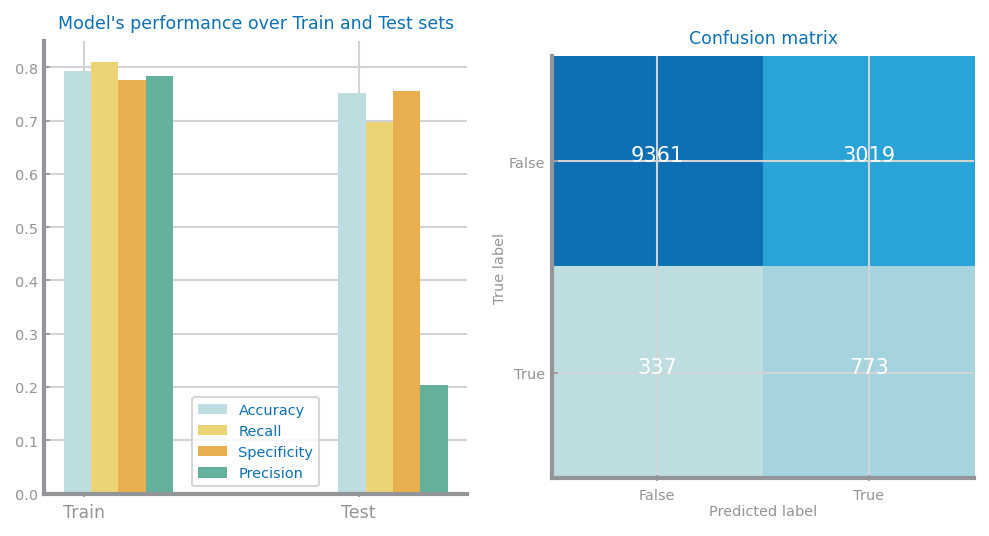

In [3]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.naive_bayes import GaussianNB

totalYTrn = np.array(())
totalPrd_trn = np.array(())
totalYTst = np.array(())
totalPrd_tst = np.array(())

clf = GaussianNB()
for sample in my_samples:
    clf.fit(sample['X_train'], sample['y_train'])
    
    prd_trn = clf.predict(sample['X_train'])
    totalYTrn = np.concatenate((totalYTrn, sample['y_train']))
    totalPrd_trn = np.concatenate((totalPrd_trn, prd_trn))
    
    prd_tst = clf.predict(sample['X_test'])
    totalYTst = np.concatenate((totalYTst, sample['y_test']))
    totalPrd_tst = np.concatenate((totalPrd_tst, prd_tst))
    
ds.plot_evaluation_results(labels, totalYTrn, totalPrd_trn, totalYTst, totalPrd_tst, showXTickLabels=True)

Mean values:
GaussianNB: 0.751
MultinomialNB: 0.795
BernoulliNB: 0.743
95% cofidence interval for accuracy:
GaussianNB: [0.732,0.77]
MultinomialNB: [0.786,0.804]
BernoulliNB: [0.733,0.754]
99% cofidence interval for accuracy:
GaussianNB: [0.722,0.78]
MultinomialNB: [0.782,0.808]
BernoulliNB: [0.728,0.759]


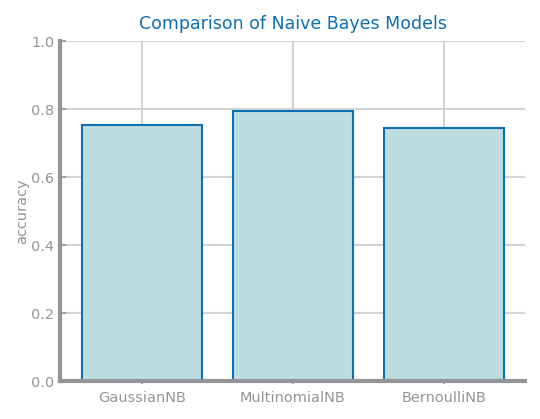

In [4]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

xvalues = [est for est in estimators]
yvalues = [np.zeros(5) for _ in estimators]

for sampl in range(len(my_samples)):
    sample = my_samples[sampl]
    for i in range(len(xvalues)):
        clf = xvalues[i]
        estimators[clf].fit(sample['X_train'], sample['y_train'])
        prdY = estimators[clf].predict(sample['X_test'])
        yvalues[i][sampl] = metrics.accuracy_score(sample['y_test'], prdY)

estimator_names = ('GaussianNB', 'MultinomialNB', 'BernoulliNB')
means = [np.mean(accs) for accs in yvalues]
stds = [np.std(accs) for accs in yvalues]
confidences = (0.95, 0.99)
t_st = (1.812, 2.764)

print("Mean values:")
for est in range(len(estimators)):
    print(f'{estimator_names[est]}: {round(means[est], 3)}')

for c in range(len(confidences)):
    conf = confidences[c]
    print(f'{int(conf*100)}% cofidence interval for accuracy:')
    for est in range(len(estimators)):
        minAcc = means[est] - t_st[c] * stds[est] / (5**0.5)
        maxAcc = means[est] + t_st[c] * stds[est] / (5**0.5)
        print(f'{estimator_names[est]}: [{round(minAcc, 3)},{round(maxAcc, 3)}]')


plt.figure()
ds.bar_chart(xvalues, means, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

### Summary

---

***Which distribution is more adequate to model our data?***



***Is the accuracy achieved good enough?***


***What is the largest kind of errors?***

